In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("../data/retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [8]:
df.shape


(1000, 9)

In [9]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [11]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [12]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [13]:
df['Date'] = pd.to_datetime(df['Date'])


In [14]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [15]:
df.columns = df.columns.str.replace(' ', '_')

In [16]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_ID', 'Gender', 'Age',
       'Product_Category', 'Quantity', 'Price_per_Unit', 'Total_Amount'],
      dtype='object')

In [ ]:
df["Product_Category"].value_counts().sort_values(ascending=False)

Product_Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [21]:
df.groupby("Product_Category")["Total_Amount"].sum().sort_values(ascending=False)

Product_Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total_Amount, dtype: int64

In [22]:
df.groupby("Product_Category")["Quantity"].sum().sort_values(ascending=False)

Product_Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64

In [23]:
df.groupby("Date")["Total_Amount"].sum().sort_values(ascending=False)

Date
2023-05-23    8455
2023-05-16    7260
2023-06-24    6220
2023-02-17    5890
2023-08-05    5205
              ... 
2023-01-19      30
2023-02-23      30
2023-05-11      30
2023-04-17      25
2023-03-08      25
Name: Total_Amount, Length: 345, dtype: int64

In [27]:
df.groupby("Date")["Quantity"].sum().sort_values(ascending=False)

Date
2023-05-23    29
2023-07-14    26
2023-05-16    26
2023-02-17    21
2023-02-05    20
              ..
2023-10-20     1
2023-11-04     1
2023-03-29     1
2023-12-21     1
2023-01-25     1
Name: Quantity, Length: 345, dtype: int64

In [28]:
df.columns


Index(['Transaction_ID', 'Date', 'Customer_ID', 'Gender', 'Age',
       'Product_Category', 'Quantity', 'Price_per_Unit', 'Total_Amount'],
      dtype='object')

In [33]:
result = df.groupby(df['Date'].dt.date).agg({
    'Total_Amount': 'sum',
    'Product_Category': 'count'
})

In [35]:
print(result)


            Total_Amount  Product_Category
Date                                      
2023-01-01          3600                 3
2023-01-02          1765                 4
2023-01-03           600                 1
2023-01-04          1240                 3
2023-01-05          1100                 3
...                  ...               ...
2023-12-27           700                 2
2023-12-28          2075                 3
2023-12-29          3400                 4
2023-12-31            50                 1
2024-01-01          1530                 2

[345 rows x 2 columns]


In [36]:
df['Month'] = df['Date'].dt.month

In [38]:
df['Month_Name'] = df['Date'].dt.strftime('%B')

In [40]:
df['Month']

0      11
1       2
2       1
3       5
4       5
       ..
995     5
996    11
997    10
998    12
999     4
Name: Month, Length: 1000, dtype: int32

In [41]:
df.head(10)

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Month,Month_Name
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,May
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,4,April
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,3,March
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,2,February
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,12,December
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,10,October


In [43]:
df.groupby(["Product_Category", "Month"])["Quantity"].sum().sort_values(ascending=False).head(10)

Product_Category  Month
Clothing          3        111
                  5         97
Electronics       5         97
                  10        95
Clothing          4         93
Electronics       12        92
                  8         87
Beauty            10        83
Clothing          8         78
                  2         75
Name: Quantity, dtype: int64

In [44]:
monthly_sales = (
    df
    .groupby(['Month', 'Month_Name'])['Total_Amount']
    .sum()
    .reset_index()
    .sort_values('Month')
)


In [45]:
df.groupby(["Product_Category", "Month"])["Quantity"].sum()


Product_Category  Month
Beauty            1         62
                  2         68
                  3         51
                  4         69
                  5         65
                  6         66
                  7         70
                  8         62
                  9         50
                  10        83
                  11        63
                  12        62
Clothing          1         72
                  2         75
                  3        111
                  4         93
                  5         97
                  6         67
                  7         45
                  8         78
                  9         60
                  10        74
                  11        69
                  12        53
Electronics       1         65
                  2         71
                  3         32
                  4         52
                  5         97
                  6         64
                  7         61
               

In [46]:
monthly_demand = (
    df
    .groupby(['Product_Category', 'Month'])['Quantity']
    .sum()
    .reset_index()
)


In [47]:
demand_variability = (
    monthly_demand
    .groupby('Product_Category')['Quantity']
    .std()
    .sort_values(ascending=False)
)


Monthly demand variability was calculated using standard deviation to identify product categories with unstable sales patterns. Categories with higher variability require more adaptive inventory strategies, while stable categories are suitable for consistent stocking.

In [49]:
df.columns


Index(['Transaction_ID', 'Date', 'Customer_ID', 'Gender', 'Age',
       'Product_Category', 'Quantity', 'Price_per_Unit', 'Total_Amount',
       'Month', 'Month_Name'],
      dtype='object')

In [54]:
import matplotlib.pyplot as plt

<Axes: ylabel='Product_Category'>

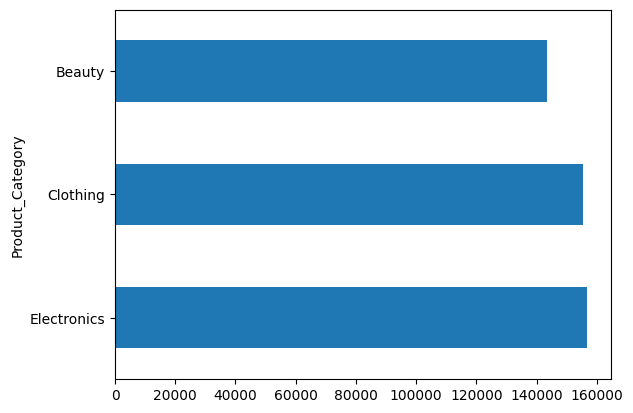

In [56]:
df.groupby("Product_Category")["Total_Amount"].sum().sort_values(ascending=False).plot(kind='barh')

Electronics and clothing generates the highest revenue, indicating they should be prioritized for restocking and promotions

<Axes: xlabel='Month_Name'>

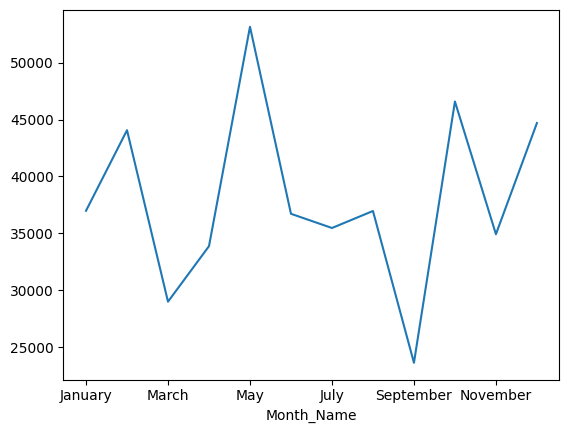

In [ ]:
monthly_sales.plot(x='Month_Name', y='Total_Sales', kind='line', legend=False)

Sales peak in May and drop in September, suggesting seasonal demand patterns.

<Axes: xlabel='Product_Category'>

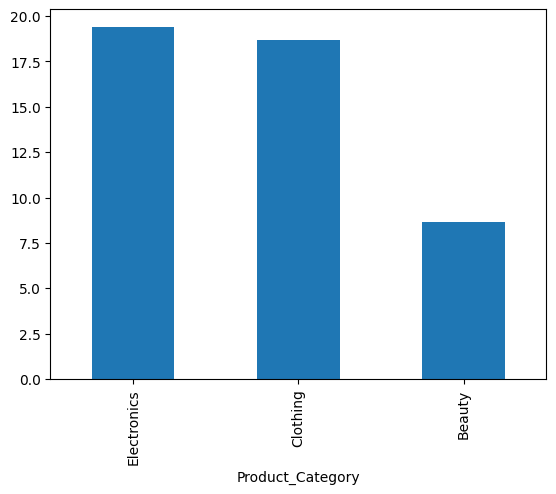

In [60]:
demand_variability.plot(kind='bar')

Categories with high variability require flexible inventory strategies or forecasting models.